
Personalisation Level Distribution:
Personalisation_Level
0    99
1    51
Name: count, dtype: int64


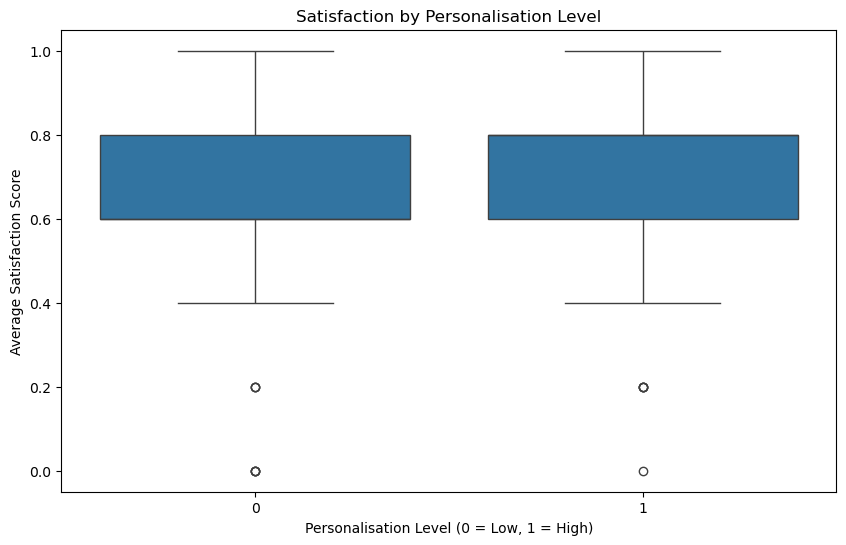


High Personalisation Satisfaction Statistics:
count    51.000000
mean      0.666667
std       0.238886
min       0.000000
25%       0.600000
50%       0.800000
75%       0.800000
max       1.000000
Name: Satisfaction_Avg, dtype: float64

Low Personalisation Satisfaction Statistics:
count    99.000000
mean      0.638384
std       0.233302
min       0.000000
25%       0.600000
50%       0.600000
75%       0.800000
max       1.000000
Name: Satisfaction_Avg, dtype: float64

High Personalisation Satisfaction Skewness: -0.7375506119311833
Low Personalisation Satisfaction Skewness: -0.7267461898627384

High Personalisation Satisfaction Kurtosis: 0.16494890383439476
Low Personalisation Satisfaction Kurtosis: 0.5503523943535855


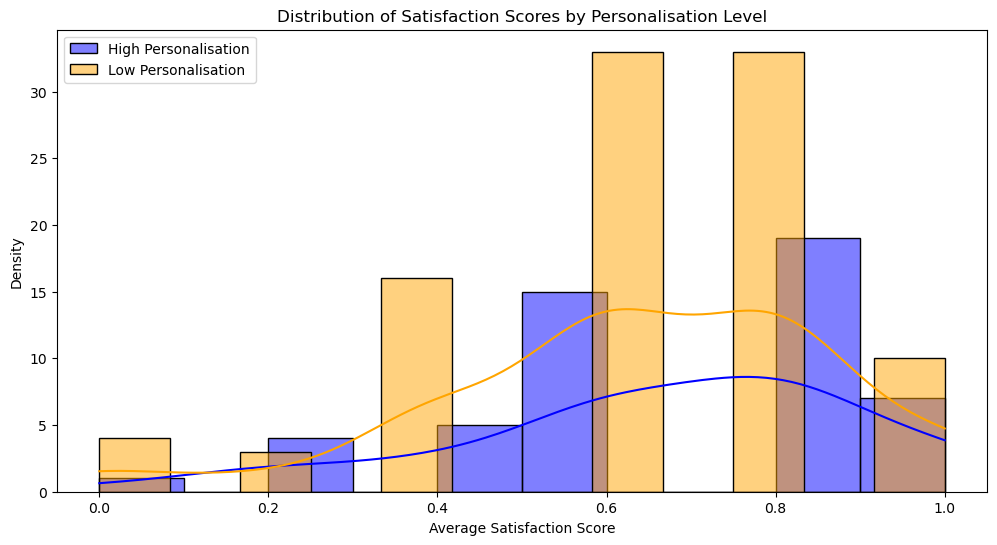

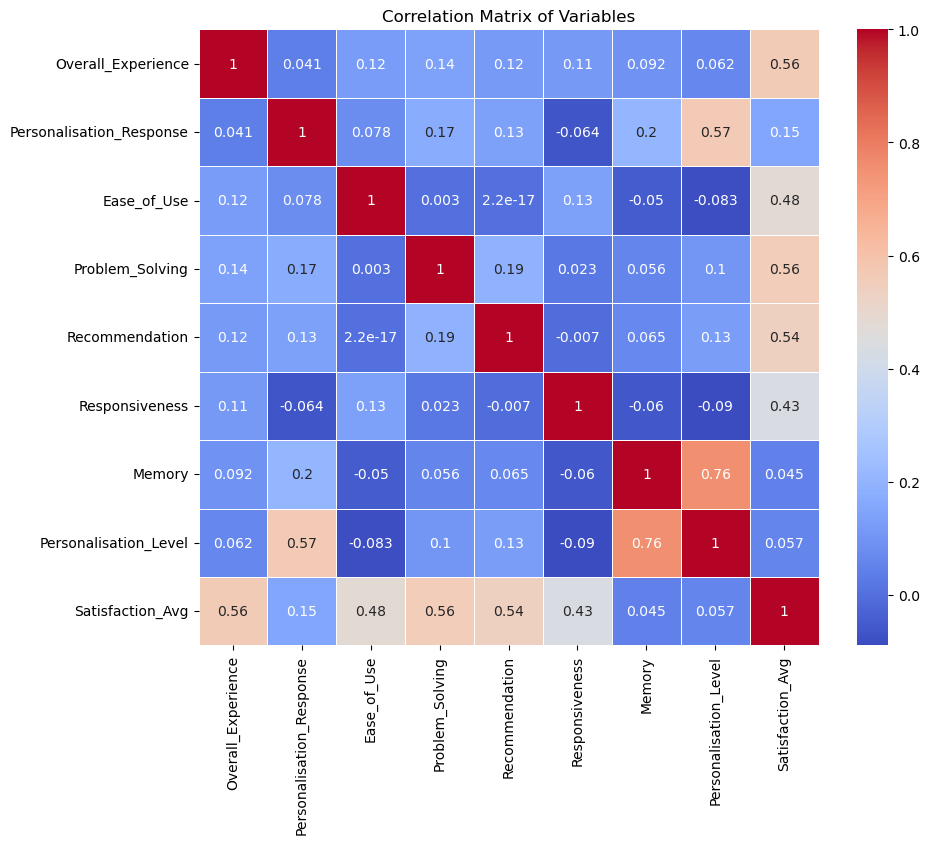

In [6]:
# Load the datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the datasets
Question_1_Data_EDA = pd.read_csv('Numerical Data Satisfaction/Numerical_Question_1.csv')
Question_2_Data_EDA = pd.read_csv('Numerical Data Personalisation/Numerical_Question_2.csv')
Question_3_Data_EDA = pd.read_csv('Numerical Data Satisfaction/Numerical_Question_3.csv')
Question_4_Data_EDA = pd.read_csv('Numerical Data Satisfaction/Numerical_Question_4.csv')
Question_5_Data_EDA = pd.read_csv('Numerical Data Satisfaction/Numerical_Question_5.csv')
Question_6_Data_EDA = pd.read_csv('Numerical Data Satisfaction/Numerical_Question_6.csv')
Question_7_Data_EDA = pd.read_csv('Numerical Data Personalisation/Numerical_Question_7.csv')

# Concatenate datasets into a single DataFrame
data = pd.concat([
    Question_1_Data_EDA.rename(columns={'Response': 'Overall_Experience'}),
    Question_2_Data_EDA.rename(columns={'Response': 'Personalisation_Response'}),
    Question_3_Data_EDA.rename(columns={'Response': 'Ease_of_Use'}),
    Question_4_Data_EDA.rename(columns={'Response': 'Problem_Solving'}),
    Question_5_Data_EDA.rename(columns={'Response': 'Recommendation'}),
    Question_6_Data_EDA.rename(columns={'Response': 'Responsiveness'}),
    Question_7_Data_EDA.rename(columns={'Response': 'Memory'})
], axis=1)

# Group 1: Personalisation (Questions 2 and 7)
personalisation_data = data[['Personalisation_Response', 'Memory']]

# Group 2: Satisfaction (Questions 1, 3, 4, 5, 6)
satisfaction_data = data[
    ['Overall_Experience', 'Ease_of_Use', 'Problem_Solving', 'Recommendation', 'Responsiveness']
]

# Create a new column for Personalisation Level
data['Personalisation_Level'] = personalisation_data.sum(axis=1).apply(lambda x: 1 if x == 2 else 0)

# Calculate average satisfaction scores for each respondent
data['Satisfaction_Avg'] = satisfaction_data.mean(axis=1)

# Quick overview of Personalisation Levels
print("\nPersonalisation Level Distribution:")
print(data['Personalisation_Level'].value_counts())

# Plotting Satisfaction by Personalisation Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personalisation_Level', y='Satisfaction_Avg', data=data)
plt.title('Satisfaction by Personalisation Level')
plt.xlabel('Personalisation Level (0 = Low, 1 = High)')
plt.ylabel('Average Satisfaction Score')
plt.show()

# Descriptive statistics for satisfaction by personalisation level
high_personalisation_stats = data[data['Personalisation_Level'] == 1]['Satisfaction_Avg'].describe()
low_personalisation_stats = data[data['Personalisation_Level'] == 0]['Satisfaction_Avg'].describe()

print("\nHigh Personalisation Satisfaction Statistics:")
print(high_personalisation_stats)

print("\nLow Personalisation Satisfaction Statistics:")
print(low_personalisation_stats)

# Calculate skewness and kurtosis for satisfaction scores by personalisation level
high_personalisation_skewness = skew(data[data['Personalisation_Level'] == 1]['Satisfaction_Avg'])
low_personalisation_skewness = skew(data[data['Personalisation_Level'] == 0]['Satisfaction_Avg'])

high_personalisation_kurtosis = kurtosis(data[data['Personalisation_Level'] == 1]['Satisfaction_Avg'])
low_personalisation_kurtosis = kurtosis(data[data['Personalisation_Level'] == 0]['Satisfaction_Avg'])

print("\nHigh Personalisation Satisfaction Skewness:", high_personalisation_skewness)
print("Low Personalisation Satisfaction Skewness:", low_personalisation_skewness)

print("\nHigh Personalisation Satisfaction Kurtosis:", high_personalisation_kurtosis)
print("Low Personalisation Satisfaction Kurtosis:", low_personalisation_kurtosis)

# Plotting the distribution of Satisfaction_Avg for each personalisation level
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Personalisation_Level'] == 1]['Satisfaction_Avg'], kde=True, color='blue', label='High Personalisation')
sns.histplot(data[data['Personalisation_Level'] == 0]['Satisfaction_Avg'], kde=True, color='orange', label='Low Personalisation')
plt.title('Distribution of Satisfaction Scores by Personalisation Level')
plt.xlabel('Average Satisfaction Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Correlation matrix for all variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show()

### Personalisation Levels Overview
There were 150 respondents in the dataset, 99 (66%) of whom had 'Low Personalisation' and 51 (34%) 'High Personalisation'. The distribution indicates that many chatbot interactions were percieved as having low personalisation. This is a very significant imbalance in sense that this means that most of users do not consider chatbot as personalised, and can affect their customer satisfaction.

### Personalisation Level Satisfaction Comparison
The satisfaction statistics were that respondents who had high personalisation had a mean satisfaction score of 0.67 and respondents with low personalisation had a slightly lower mean satisfaction of 0.64. Although the high personalisation mean satisfaction score was higher, it was not much (approximately 0.03). And while we see this slight increase in satisfaction with higher personalisation — it suggests that personalisation might help improve customer experience, but the effect is not big.

- **High Personalisation Satisfaction Statistics**:
  - Mean: 0.67
  - Standard Deviation: 0.24
  - Median: 0.80
  - Minimum: 0.00, Maximum: 1.00

- **Low Personalisation Satisfaction Statistics**:
  - Mean: 0.64
  - Standard Deviation: 0.23
  - Median: 0.60
  - Minimum: 0.00, Maximum: 1.00

A comparison between the median satisfaction score for high personalisation (0.80) and low personalisation (0.60) suggests that customers who experience personalised chatbot responses tend to have a higher midpoint level of satisfaction. Furthermore, the interquartile range (IQR) of the two personalisation levels suggests that satisfaction scores are confined between 0.60 and 0.80, and the upper quartile is more significant for high personalisation. This proves that personalisation improves satisfaction for many users.

### Skewness and Kurtosis analysis
- **Skewness**: The skewness values for high personalisation (-0.74) and low personalisation (-0.73) suggest moderately left skew distribution. What this means is that more respondents gave satisfaction scores closer to the top end of the scale, though there were a few lower scores in both distributions. This is good news for chatbot interactions as a whole, as the negative skewness indicates that most of the respondents had satisfaction levels above the average value.

- **Kurtosis**: Both distributions have nearly normal peaks, but with slightly heavier tails, and the kurtosis value (0.16) for high personalisation and (0.55) for low personalisation indicates that the tail length is similar. The results suggest that there are some outliers, but not so extreme ones, and a kurtosis value close to zero indicates a distribution as similar to the normal distribution. But the slightly higher kurtosis for low personalisation indicates a slightly higher number of extreme values than for high personalisation.

### Distribution and Correlation Insights
The distribution plot indicated that low and high personalisation levels had satisfaction scores clustered around 0.60 and 0.80, and that the low personalisation group had a higher density of values around these values. This shows that a great deal of users of both groups were quite contented however the excess in scores in low personalisation group points to a lack of distinction in the degree of fulfilment, implying which personalisation is not totally taken keene to maximise satisfaction.

The two variables with the highest correlation to overall satisfaction (Satisfaction_Avg) were personalisation related (personalisation_response and memory). The correlation was not strong (≈0.15), however, suggesting that personalisation contributes to satisfaction, but is not the dominant factor. The finding agrees with the mean differences found, where the effect of personalisation on satisfaction was positive but not strongly positive.

### Conclusions
Analysis shows that there is a small but significant increase in customer satisfaction when chatbot interactions are personalised for SMEs at higher levels. High personalisation produces a marginally higher mean satisfaction score (0.67) than low personalisation (0.64). Also, the trend in median scores (0.80 vs. 0.60) supports this, since customers would be more satisfied with personalised responses.

Yet the effect of personalisation on satisfaction is not very large, as suggested by the small difference in means and the moderate correlation between personalisation and satisfaction. The satisfaction scores are left skewed in both the groups, indicating that most customers are at the least moderately satisfied, independent of personalisation level. Overall, the results imply that although personalisation is likely to enhance customer satisfaction, it is not the main factor in determining how much the customer experiences with chatbots in SMEs.

### Recommendations
1. **Increase Personalisation Features**: Since the personalisation has a small but positive impact, SMEs should invest in upgrading the personalisation features of chatbots to further increase customer satisfaction.

2. **Focus on Other Satisfaction Drivers**: This means that while personalisation doesn’t entirely explain the distribution of satisfaction, there are other things we can work on to improve other aspects of chatbot interaction, like responsiveness, problem solving ability, and overall ease of use.

3. **Balanced Implementation**: With the modest effect, personalisation should be proportioned with efficiency and accuracy to achieve high overall quality customer experience with minimum costs and complexity in chat bot develpment.

